In [1]:
import numpy as np
from scipy import linalg
# do your imports

# LUNG.txt 
# his is an N×K matrix of gene expression levels ofKgenes forN(human)individuals in the lung tissues 
# collected by GTEx (Genotype-Tissue Expression Project)consortium.
expression = np.loadtxt(open("LUNG.txt", "r"))
#annotations = np.loadtxt(open("LUNG_gene_annot.txt", "r"), skiprows=1) -- mult dtypes -- use pandas if need

# LUNG_gene_annot.txt
# The information on the K genes in the file above is stored inthis file.
# Note the first row is header. 
# All the remaining rows contain gene annotationsin the order of the genes that appear in ‘LUNG.txt’
expression.shape # rows are samples, columns are genes, should mean center wrt rows I believe

(515, 10000)

In [2]:
import matplotlib.pyplot as plt

# mean center the data -- across row or column?
X = expression - np.mean(expression, axis=0)
print(np.mean(expression, axis=0).shape)
# compute the covariance matrix
S = (X.T @ X) / 514 # N-1 = 514
print(S.shape)
# get the eigendecomposition -- w is eigenvalues, v is eigenvectors - this is slow
w, v = linalg.eigh(S)

(10000,)
(10000, 10000)


In [3]:
X

array([[-1.87810386, -0.06258407,  0.73177709, ..., -0.16755035,
        -0.18856786, -2.36890826],
       [ 1.02549638,  0.06778459, -1.0501432 , ...,  0.92641798,
        -0.40176168,  1.5024137 ],
       [-0.09527484, -0.13670329, -1.06484128, ...,  0.04469512,
        -0.27393344,  3.52491013],
       ...,
       [-0.29737485, -0.06258407, -1.42722571, ..., -0.68741277,
        -1.58004189, -2.55396925],
       [-0.18275717, -0.10431172, -1.34352801, ...,  1.720339  ,
        -0.87879734,  0.58319923],
       [-1.07828534,  0.86673478,  1.06571369, ..., -0.69996039,
        -0.88157228, -0.61433018]])

In [4]:
S

array([[ 1.32097692,  0.41026047,  0.09002952, ...,  0.56544557,
        -0.01717452,  0.42810913],
       [ 0.41026047,  2.08801393,  2.48843055, ...,  0.28991912,
         0.02414304,  0.0485529 ],
       [ 0.09002952,  2.48843055,  4.0077821 , ...,  0.24820054,
         0.24389548, -0.0521597 ],
       ...,
       [ 0.56544557,  0.28991912,  0.24820054, ...,  1.88819876,
         0.72604838,  0.21783714],
       [-0.01717452,  0.02414304,  0.24389548, ...,  0.72604838,
         2.01197937, -0.28372933],
       [ 0.42810913,  0.0485529 , -0.0521597 , ...,  0.21783714,
        -0.28372933,  1.76022312]])

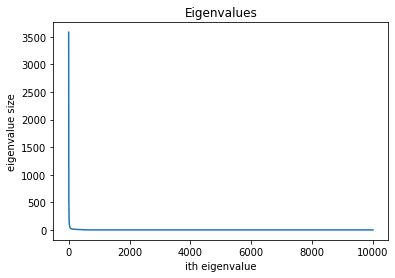

In [5]:
# reverse the sort of the w 
desc_w = -np.sort(-w)
# plot the eigenvalues in descending order --eigh comes out ascending
plt.plot([i for i in range(len(desc_w))], desc_w)
plt.title(label="Eigenvalues")
plt.xlabel("ith eigenvalue")
plt.ylabel("eigenvalue size")
plt.savefig("Desc_eigenvals.png")
plt.show()
plt.close()

In [6]:
asc_w = np.sort(w)
v[:, -1], v[:, -2]

(array([-0.00564938, -0.00566493, -0.00122904, ..., -0.00628595,
         0.00149719, -0.00094042]),
 array([-0.01030784,  0.0019338 ,  0.00553198, ..., -0.0105103 ,
         0.00313366, -0.02312162]))

3584.1633659403046 2200.579362647462
[[-0.00564938 -0.01030784]
 [-0.00566493  0.0019338 ]
 [-0.00122904  0.00553198]
 ...
 [-0.00628595 -0.0105103 ]
 [ 0.00149719  0.00313366]
 [-0.00094042 -0.02312162]]
(515, 2)


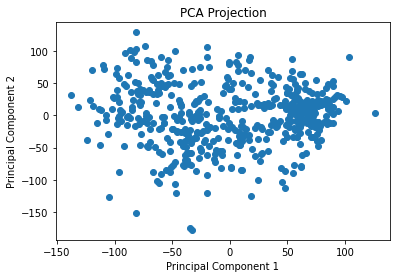

In [7]:
# choose the two largest eigenvalues
print(desc_w[0], desc_w[1])
# Project the original gene expression into the two dimensional space from above

evects = np.column_stack((v[:, -1], v[:, -2]))
# (515, 10000) (10000,2) -> (515, 2) -- is this what I want? -- do the vects need to be scaled by the vals?
reduced_dim_data = X @ evects 
print(evects)
print(reduced_dim_data.shape)

# make a scatterplot of the projected data. -- lol pretty sure something is sus here
plt.scatter(reduced_dim_data[:,0], reduced_dim_data[:,1])
plt.title(label="PCA Projection")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.savefig("PCA_scatterplot.png")
plt.show()
plt.close()

# determine the sum of all the eigenvalues
sum_eigvals = np.sum(desc_w)
# scale all your eigenvalues by this sum
scaled_eigvals = desc_w / sum_eigvals


In [8]:
# determine how many eignvalues you need to get >= 0.90
print(np.sum(scaled_eigvals[:210])) # need 210 eignvalues

0.9001238086868536


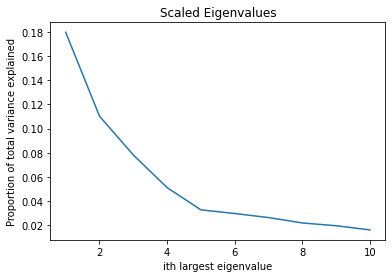

In [9]:
plt.plot([i+1 for i in range(len(scaled_eigvals[:10]))], scaled_eigvals[:10])
plt.title(label="Scaled Eigenvalues")
plt.xlabel("ith largest eigenvalue")
plt.ylabel("Proportion of total variance explained")
#plt.savefig("RR0.005.pdf")
plt.show()
plt.close()

In [17]:
class HMM():
    def __init__(self):
        self.pi = np.array([0.2, 0.3, 0.3, 0.2])
        self.T = np.array( [[0.3, 0.1, 0.3, 0.3], 
                            [0.1, 0.4, 0.1, 0.4],
                            [0.1, 0.1, 0.4, 0.4],
                            [0.1, 0.1, 0.1 ,0.7]])
        self.E =  np.array([  [0.9, 0.1],
                              [0.8, 0.2],
                              [0.9, 0.1],
                              [0.2, 0.8]])
        
    def state_map(self, letter):
        if letter == "P":
            return 0
        elif letter == "E":
            return 1
        elif letter == "R":
            return 2
        else:
            return 3
    # define a function that given a sequence of states and emissions
    # gives the probability of this pair
    def get_joint_prob(self, state_path, emitted_sequence):
        # init
        joint_prob = self.pi[self.state_map(state_path[0])]
        for i in range(1, len(state_path)):
            old_index = self.state_map(state_path[i-1])
            new_index = self.state_map(state_path[i])
            transition_prob = self.T[old_index, new_index]
            # no map needed for emissions, already {0,1}
            emission_prob = self.E[old_index, int(emitted_sequence[i-1])]
            joint_prob *= emission_prob * transition_prob
            # not quite right -- will only give me t-1 emissions
        # this should fix it
        joint_prob *=  self.E[new_index, int(emitted_sequence[-1])]
        return joint_prob

    def forward_backward(self, state_path, emitted_sequence):
        # alpha inits -- must do one for each state in the set
        alpha = np.zeros((len(emitted_sequence), len(self.pi)))
        for x in range(len(self.pi)):
            alpha[0,x] = self.pi[x] * self.E[x][int(emitted_sequence[0])]
        # forward
        for i in range(1, len(emitted_sequence)):
            for j in range(len(self.pi)):
                alpha[i,j] = np.sum(
                                    [self.E[j][int(emitted_sequence[i])]  * 
                                     self.T[k,j] * 
                                     alpha[i-1, k] 
                              for k in range(len(self.pi))])

        # beta inits
        beta = np.zeros((len(emitted_sequence), len(self.pi)))
        for x in range(len(self.pi)):
            beta[-1,x] = 1
        # backward 
        for i in range(len(emitted_sequence)-2, -1, -1):
            for j in range(len(self.pi)):
#                 print(beta[i,j], beta[i+1,j])
#                 print(self.E[:, int(emitted_sequence[i+1])])
#                 print(self.T[:,k])
                #print(self.T[j,0],self.T[j,1], self.T[j,2],self.T[j,3])
#                 print(self.T[0,j],self.T[1,j], self.T[2,j],self.T[3,j])
                beta[i,j] = np.sum( # might need to be i+1 for the second index of E
                                    [self.E[k, int(emitted_sequence[i+1])]  * 
                                    # 
                                    self.T[j,k] * 
                                    beta[i+1, k] 
                              for k in range(len(self.pi))])
        print(alpha, "alpha")
        print(beta, "beta")
        # calc the joint by summing rows of the alpha for each column
        joint = np.sum(alpha, axis=1)[-1]
        print(joint,"1iii")
        # do another for loop to get 1iv
        prob_Q = self.pi[self.state_map(state_path[0])]
        prob_O_given_Q = self.E[self.state_map(state_path[0]), int(emitted_sequence[0])]
        for i in range(1, len(state_path)):
            # transition
            old_index = self.state_map(state_path[i-1])
            new_index = self.state_map(state_path[i])
            prob_Q *= self.T[old_index,new_index]
            # conditional emissions
            prob_O_given_Q *= self.E[self.state_map(state_path[i]), int(emitted_sequence[i])]
        print((prob_O_given_Q*prob_Q)/(joint), "1iv")
        # q_3 = R | 010011
        alpha_3_R = alpha[2,2]
        beta_3_R = beta[2,2]
        alpha_3_all= np.sum(alpha[2,])
        beta_3_all= np.sum(beta[2,])
        print(np.sum(alpha[2,]*beta[2,]))
        print((alpha_3_R*beta_3_R)/np.sum(alpha[2,]*beta[2,]), "1v")
        
        
    def viterbi(self, emitted_sequence):
        alpha = np.zeros((len(emitted_sequence), len(self.pi)))
        for x in range(len(self.pi)):
            alpha[0,x] = self.pi[x] * self.E[x][int(emitted_sequence[0])]
        # forward
        for i in range(1, len(emitted_sequence)):
            for j in range(len(self.pi)):
                # it skipped the first emission
#                 print(len(self.pi))
#                 print(j, int(emitted_sequence[i]))
                #print(alpha[i, 0],alpha[i, 1],alpha[i, 2],alpha[i, 3])
                alpha[i,j] = np.max(
                                    [self.E[j][int(emitted_sequence[i])]  * 
                                     self.T[k,j] * 
                                     alpha[i-1, k] 
                              for k in range(len(self.pi))])
        print([np.argmax(alpha[i])+1 for i in range(alpha.shape[0])])
        

    def calc_params_from_obs(self, observed_state_paths, observed_emission_sequences):
        # tokenize and count states
        state_counts = [0,0,0,0]
        for state_path in observed_state_paths:
            state_counts[self.state_map(state_path[0])] += 1
        # calc init dists
        state_counts = state_counts / np.sum(state_counts)
        print(state_counts)
        # transitions -- use a sliding window of 2 
        new_T = np.zeros((len(self.pi), len(self.pi)))
        for i in range(len(observed_state_paths)):
            for j in range(len(observed_state_paths[0]) - 1):
                window = ( observed_state_paths[i][j:j+2] )
                new_T[self.state_map(window[0]), self.state_map(window[1])] += 1
                
        for row_i in range(new_T.shape[0]):
            new_T[row_i, :] = new_T[row_i, :] / np.sum(new_T[row_i, :])
        print(new_T)
        # emissions 
        new_E = np.zeros((len(self.pi), 2))
        for sequence_i in range(len(observed_emission_sequences)):
            for index in range(len(observed_emission_sequences[0])):
                emission = observed_emission_sequences[sequence_i][index]
                state = observed_state_paths[sequence_i][index]
                new_E[self.state_map(state), int(emission)] += 1
        for row_i in range(new_E.shape[0]):
            new_E[row_i, :] = new_E[row_i, :] / np.sum(new_E[row_i, :])
        print(new_E)
        return
            
        
# Compute α’s and β’s for each position.

# great theoretically, these are all done now, double check with others!!
# compute P(PBRRRB,010011)
HMM_instance = HMM()
state_path, emitted_sequence = "PBRRRB", "010011"
#state_path, emitted_sequence = "PB", "01"
print(HMM_instance.get_joint_prob(state_path, emitted_sequence))
# Compute the probability P(010011) -- really need to do with calc
# must sum over all state paths -- there will be something easier to calc --check durands book
#emitted_sequence = "01"
# Compute the probability P(PBRRRB|010011). --need f-b algo
print(HMM_instance.forward_backward(state_path, emitted_sequence))
# Compute the probability P(q3=R|010011) -- need f-b algo

# Compute the most probable sequence of annotation given this methylation
# data -- Vitterbi
print(HMM_instance.viterbi(emitted_sequence))
# calc params from fully observed data
observed_state_paths = ["PBRRRB", "BEBPRR", "EBPRRB"]
observed_emission_sequences = ["010011", "101001", "010101"]
HMM_instance.calc_params_from_obs(observed_state_paths, observed_emission_sequences)


1.791590400000001e-05
[[0.18       0.24       0.27       0.04      ]
 [0.0109     0.029      0.019      0.2288    ]
 [0.027855   0.029976   0.032985   0.036526  ]
 [0.01647468 0.0173816  0.02538063 0.01182182]
 [0.00104008 0.00246407 0.0018015  0.02425806]
 [0.00031644 0.00073912 0.00037048 0.01519911]] alpha
[[0.01922127 0.02446056 0.02226473 0.03208288]
 [0.09473572 0.07823366 0.08327273 0.05131808]
 [0.145789   0.137945   0.141281   0.103187  ]
 [0.1737     0.2327     0.2192     0.3515    ]
 [0.32       0.42       0.39       0.6       ]
 [1.         1.         1.         1.        ]] beta
0.016625154062000005 1iii
0.001077638374548977 1iv
0.016625154062000005
0.2803074045281591 1v
None
[3, 4, 4, 3, 4, 4]
None
[0.33333333 0.33333333 0.         0.33333333]
[[0.         0.         0.66666667 0.33333333]
 [0.         0.         0.         1.        ]
 [0.         0.         0.66666667 0.33333333]
 [0.5        0.25       0.25       0.        ]]
[[1.         0.        ]
 [1.         0.   

In [11]:
0.2*0.9*0.3*0.8*0.1*0.9*0.4*0.9*0.4*0.1*0.4*0.8

1.791590400000001e-05

In [12]:
0.3*0.1*0.2*0.9+0.1*0.1*0.3*0.8+0.1*0.1*0.3*0.9+0.1*0.1*0.2*0.2 # nice!

0.010900000000000002

In [13]:
0.1*0.2*0.2*0.9+0.4*0.2*0.3*0.8+0.1*0.2*0.3*0.9+0.1*0.2*0.2*0.2 

0.02900000000000001

In [14]:
0.1*0.3+0.2*0.1+0.1*0.1+0.8*0.1

0.14

In [15]:
0.7 *0.2

0.13999999999999999

In [16]:
0.1*0.9

0.09000000000000001